<a href="https://colab.research.google.com/github/Chaitanya-Shinde/DeepLearning/blob/main/CNNs_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementing Convolutional Neural networks with keras

i will be using the MNIST dataset to train and test the model

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [2]:
#importing the dataset
from keras.datasets import mnist

#loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

reshaping the images

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype('float32')

In [6]:
X_train.shape

(60000, 28, 28, 1)

normalizing the pixel values

In [7]:
#normalizing the pixel values
X_train = X_train / 255
X_test = X_test / 255

Converting the target variale into categories

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
y_test.shape

(10000, 10)

In [10]:
num_classes = y_test.shape[1]

In [11]:
X_train[0].shape

(28, 28, 1)

## building the model

In [12]:
def convolutionalModel():
  model = Sequential()
  model.add(Input(shape=(X_train[0].shape)))
  model.add(Conv2D(16, (5,5), strides=(1,1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

## Training the model

In [13]:
model = convolutionalModel()
model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs = 10, batch_size = 200)


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8349 - loss: 0.6020 - val_accuracy: 0.9721 - val_loss: 0.0937
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9721 - loss: 0.0929 - val_accuracy: 0.9812 - val_loss: 0.0614
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9833 - loss: 0.0565 - val_accuracy: 0.9798 - val_loss: 0.0620
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9866 - loss: 0.0444 - val_accuracy: 0.9856 - val_loss: 0.0466
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9911 - loss: 0.0307 - val_accuracy: 0.9848 - val_loss: 0.0432
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9920 - loss: 0.0282 - val_accuracy: 0.9861 - val_loss: 0.0387
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9932 - loss: 0.0232 - val_accuracy: 0.9864 - val_loss: 0.0437
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9945 - loss: 0.0191 - val_accuracy: 0.

In [14]:
scores  = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9851 - loss: 0.0514


In [15]:
scores

[0.042507924139499664, 0.9869999885559082]

In [16]:
print(f'The accuracy of the model is: {scores[1]}\nThe error is: {100 - scores[1]* 100}')

The accuracy of the model is: 0.9869999885559082
The error is: 1.3000011444091797


## practice 1

convolutional model with 2 convolutional and pooling layers

In [17]:
def convolutionalModel1():
    # create model
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))
    model.add(Conv2D(16, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(8, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

In [18]:
model1 = convolutionalModel1()
model1.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7084 - loss: 0.9784 - val_accuracy: 0.9543 - val_loss: 0.1566
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9558 - loss: 0.1468 - val_accuracy: 0.9721 - val_loss: 0.0919
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9712 - loss: 0.0951 - val_accuracy: 0.9792 - val_loss: 0.0645
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9771 - loss: 0.0751 - val_accuracy: 0.9800 - val_loss: 0.0589
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9795 - loss: 0.0633 - val_accuracy: 0.9827 - val_loss: 0.0526
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9831 - loss: 0.0545 - val_accuracy: 0.9862 - val_loss: 0.0435
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9857 - loss: 0.0464 - val_accuracy: 0.9864 - val_loss: 0.0407
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9874 - loss: 0.0401 - val_accuracy: 0.

In [19]:
scores1 = model1.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9862 - loss: 0.0421


In [20]:
scores1

[0.0336611345410347, 0.9889000058174133]

In [21]:
print(f'The accuracy of the model is: {scores1[1]}\nThe error is: {100 - scores1[1]* 100}')

The accuracy of the model is: 0.9889000058174133
The error is: 1.109999418258667


## practice 2

changing batch_size to 1024

In [22]:
model2 = convolutionalModel1()
model2.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10, batch_size=1024)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.4227 - loss: 1.8816 - val_accuracy: 0.8854 - val_loss: 0.3803
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9019 - loss: 0.3306 - val_accuracy: 0.9459 - val_loss: 0.1909
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9451 - loss: 0.1860 - val_accuracy: 0.9615 - val_loss: 0.1323
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9603 - loss: 0.1320 - val_accuracy: 0.9686 - val_loss: 0.1050
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9663 - loss: 0.1075 - val_accuracy: 0.9738 - val_loss: 0.0878
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9722 - loss: 0.0890 - val_accuracy: 0.9754 - val_loss: 0.0796
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9746 - loss: 0.0817 - val_accuracy: 0.9781 - val_loss: 0.0705
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9763 - loss: 0.0749 - val_accuracy: 0.9773 - val_loss

In [23]:
scores2 = model.evaluate(X_train,y_train)
scores2

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9961 - loss: 0.0124


[0.012521274387836456, 0.9962833523750305]

In [24]:
print(f'The accuracy of the model is: {scores2[1]}\nThe error is: {100 - scores2[1]* 100}')

The accuracy of the model is: 0.9962833523750305
The error is: 0.37166476249694824


## practice 3

batch_size=1024 and epochs=25

In [25]:
model3 = convolutionalModel1()
model3.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=25, batch_size=1024)

Epoch 1/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.4881 - loss: 1.7947 - val_accuracy: 0.8771 - val_loss: 0.4305
Epoch 2/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8877 - loss: 0.3894 - val_accuracy: 0.9273 - val_loss: 0.2479
Epoch 3/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9291 - loss: 0.2420 - val_accuracy: 0.9514 - val_loss: 0.1666
Epoch 4/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9496 - loss: 0.1717 - val_accuracy: 0.9619 - val_loss: 0.1304
Epoch 5/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9583 - loss: 0.1425 - val_accuracy: 0.9694 - val_loss: 0.1022
Epoch 6/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9669 - loss: 0.1116 - val_accuracy: 0.9728 - val_loss: 0.0914
Epoch 7/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9708 - loss: 0.0966 - val_accuracy: 0.9739 - val_loss: 0.0839
Epoch 8/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9740 - loss: 0.0878 - val_accuracy: 0.9764 - val_los

In [26]:
scores3 = model3.evaluate(X_train,y_train)
scores3

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9886 - loss: 0.0350


[0.03478999435901642, 0.9888333082199097]

In [27]:
print(f'The accuracy of the model is: {scores3[1]}\nThe error is: {100 - scores3[1]* 100}')

The accuracy of the model is: 0.9888333082199097
The error is: 1.1166691780090332


In [28]:
all_scores = [scores,scores1,scores2,scores3]
count = 1
for score in all_scores:
  print(f"Model {count}: Accuracy: {score[1]} and Error: {100-score[1] * 100}")
  count+= 1


Model 1: Accuracy: 0.9869999885559082 and Error: 1.3000011444091797
Model 2: Accuracy: 0.9889000058174133 and Error: 1.109999418258667
Model 3: Accuracy: 0.9962833523750305 and Error: 0.37166476249694824
Model 4: Accuracy: 0.9888333082199097 and Error: 1.1166691780090332


## Implementing the model

In [29]:
import cv2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


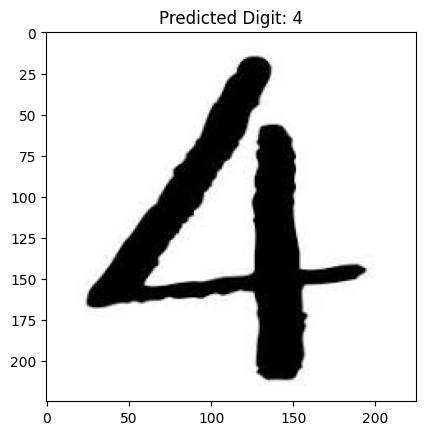

In [32]:
def classify_and_display_digit(image_path):
  # loading and preprocessing the Image
  img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  plt.imshow(img, cmap='gray')  # Displaying the image in grayscale
  img = cv2.resize(img, (28, 28))  # Resizing to match MNIST data
  img = img / 255.0  # Normalizing pixel values
  img = img.reshape(1, 28, 28, 1)  # Reshaping for model input - Changed this line

  #making predictions using the Model
  prediction = model1.predict(img)
  predicted_digit = np.argmax(prediction)  # Get the predicted digit

  plt.title(f"Predicted Digit: {predicted_digit}")
  plt.show()

#implementation
image_path = '/content/handwritten_4.jpg'  # Replace with your image path
classify_and_display_digit(image_path)